<a href="https://colab.research.google.com/github/Charlotte-99/Classifying_Cosmological_Data/blob/main/StringMapExtractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generating mini-maps**
Section to mount drive and navigate to folder with .fits files.

In [ ]:
# Mount google drive folder with .fits maps
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change directory to project folder
import os
os.chdir('/content/drive/My Drive/Project')

In [ ]:
!pip install healpy

     |████████████████████████████████| 15.8MB 254kB/s 


In [ ]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# **String map patches**
In this section we extract patches from one of the three string maps.

First we load one of the three maps.

In [ ]:
map = hp.fitsfunc.read_map('map1n_allz_rtaapixlw_2048_3.fits')

/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


Then we can plot this map (just to check).

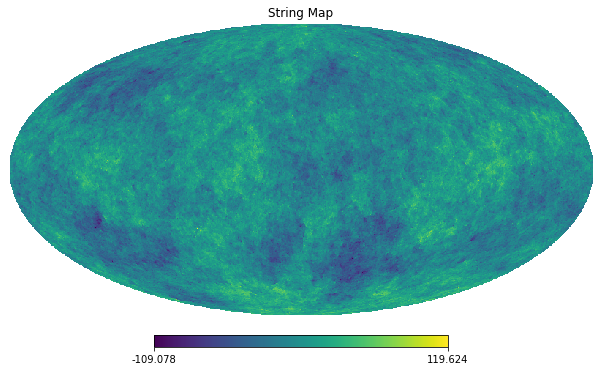

In [ ]:

hp.mollview(map,
            title='String Map')

This map looks different to the CMB maps as it is instead showing the cosmic strings which we will add to the data

We can now start extracting random segments from this map.

# **Map extraction**
We will extract maps from this map at points separated by 5 degrees in longitude, and 10 degrees in latitude within the the range of -60 to 60 degrees only, to avoid overlap as much as possible

In [ ]:
# Generate coordinate locations with specified separations
lon_list = np.arange(0, 360, 10)
lat_list = np.arange(-60, 65, 5)

print(lon_list)
print(lat_list)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350]
[-60 -55 -50 -45 -40 -35 -30 -25 -20 -15 -10  -5   0   5  10  15  20  25
  30  35  40  45  50  55  60]


We can use these to extract 10 degree squared patches centred on these (lon, lat) points.

In [ ]:
def extract_map(map, rot, deg_side, pixel_side):
  '''
  rot must be a tuple (lon, lat, psi) where lon, lat specify where the
  centre of the extracted map will be and psi specifies a rotation.
  All of these are in units of degrees.
  '''
  reso = 60*deg_side/pixel_side
  mini_map = hp.visufunc.gnomview(map, rot=rot, xsize=pixel_side,
                                  reso=reso, return_projected_map=True,
                                  no_plot=True)
  return mini_map

In [ ]:
import itertools

In [ ]:
locations = list(itertools.product(lon_list, lat_list))

900


In [ ]:
# Extract maps at specified positions, and with increased resolution to 1.5 arcmin
deg_side = 5
pixel_side = 200
num_maps = len(lon_list)*len(lat_list)

mini_maps = [None]*num_maps
for n, (lon, lat) in enumerate(locations):
  mini_maps[n] = extract_map(map, (lon, lat, 0), deg_side, pixel_side)

We can then turn this list into an array of size (num_maps, pixel_side, pixel_side).

In [ ]:
mini_maps = np.array(mini_maps)
mini_maps.shape

(900, 200, 200)

We can now save this array to a .npy file.

In [ ]:
np.save('string_map_extracts_3_res_1_5.npy', mini_maps)


Double check some of the images we've extracted to see if they're good...

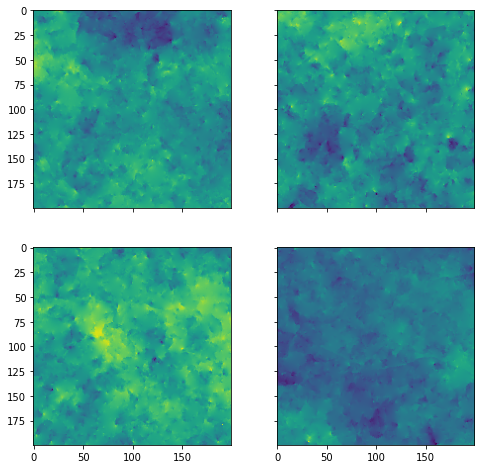

In [ ]:

which_ones = np.random.randint(0, num_maps, 4)
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True,
                         figsize=(8, 8))
for i, ax in enumerate(axes.flat):
  ax.imshow(mini_maps[which_ones[i]])